In [168]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Settings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

print("Libraries imported successfully!")

Libraries imported successfully!


In [169]:
test = pd.read_csv('rossmann-store-sales/test.csv', parse_dates=['Date'])
store = pd.read_csv('rossmann-store-sales/store.csv')

print(f"Test dataset shape: {test.shape}")
print(f"Store dataset shape: {store.shape}")

Test dataset shape: (41088, 8)
Store dataset shape: (1115, 10)


In [170]:
# Display first rows of training data
print("Test Data Sample:")
display(test.head())

Test Data Sample:


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.000,1,0,0
1,2,3,4,2015-09-17,1.000,1,0,0
2,3,7,4,2015-09-17,1.000,1,0,0
3,4,8,4,2015-09-17,1.000,1,0,0
4,5,9,4,2015-09-17,1.000,1,0,0


In [171]:
test = test.drop(columns=['Id'], axis = 1)
test.head()

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,4,2015-09-17,1.000,1,0,0
1,3,4,2015-09-17,1.000,1,0,0
2,7,4,2015-09-17,1.000,1,0,0
3,8,4,2015-09-17,1.000,1,0,0
4,9,4,2015-09-17,1.000,1,0,0


In [172]:
# Display store information
print("Store Information Sample:")
display(store.head())

Store Information Sample:


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.000,9.000,2008.000,0,NaN,NaN,NaN
1,2,a,a,570.000,11.000,2007.000,1,13.000,2010.000,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.000,12.000,2006.000,1,14.000,2011.000,"Jan,Apr,Jul,Oct"
3,4,c,c,620.000,9.000,2009.000,0,NaN,NaN,NaN
4,5,a,a,29910.000,4.000,2015.000,0,NaN,NaN,NaN


In [173]:
test = test.merge(store, on = "Store", how = "left")
print("Test Data with Store Info:")
test.head()

Test Data with Store Info:


,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,4,2015-09-17,1.000,1,0,0,c,a,1270.000,9.000,2008.000,0,NaN,NaN,NaN
1,3,4,2015-09-17,1.000,1,0,0,a,a,14130.000,12.000,2006.000,1,14.000,2011.000,"Jan,Apr,Jul,Oct"
2,7,4,2015-09-17,1.000,1,0,0,a,c,24000.000,4.000,2013.000,0,NaN,NaN,NaN
3,8,4,2015-09-17,1.000,1,0,0,a,a,7520.000,10.000,2014.000,0,NaN,NaN,NaN
4,9,4,2015-09-17,1.000,1,0,0,a,c,2030.000,8.000,2000.000,0,NaN,NaN,NaN


In [174]:
test_original = test.copy()

In [175]:
# 2) Variabile StateHoliday: allineare lo zero e inserirlo come stringa
print("StateHoliday values BEFORE conversion:")
print(test['StateHoliday'].value_counts(dropna=False))

# Convert to string
test['StateHoliday'] = test['StateHoliday'].astype(str)

print("\nStateHoliday values AFTER conversion:")
print(test['StateHoliday'].value_counts(dropna=False))

StateHoliday values BEFORE conversion:
StateHoliday
0    40908
a      180
Name: count, dtype: int64

StateHoliday values AFTER conversion:
StateHoliday
0    40908
a      180
Name: count, dtype: int64


In [176]:
# 3) Verificare per ogni variabile il numero di valori nulli
missing_count = test.isnull().sum()
missing_pct = 100 * missing_count / len(test)

missing_df = pd.DataFrame({
    'Variable': test.columns,
    'Missing Count': missing_count.values,
    'Missing %': missing_pct.values
})

missing_df = missing_df.sort_values('Missing Count', ascending=False)

print(f"Total records: {len(test)}\n")
display(missing_df)

Total records: 41088



,Variable,Missing Count,Missing %
13,Promo2SinceWeek,17232,41.939
14,Promo2SinceYear,17232,41.939
15,PromoInterval,17232,41.939
10,CompetitionOpenSinceMonth,15216,37.033
11,CompetitionOpenSinceYear,15216,37.033
9,CompetitionDistance,96,0.234
3,Open,11,0.027
0,Store,0,0.000
1,DayOfWeek,0,0.000
2,Date,0,0.000


In [177]:
# The imputation will be applied only to the train dataframe for now.
# We will use statistics from the train dataset itself to derive imputation values.

# --- 1. Define Imputation Values ---

# For Cluster 1: "Assenza di Competitor"
# Impute with a value signifying "infinitely far". We take twice the max observed distance from the train set.
imputation_distance = test['CompetitionDistance'].max() * 2
imputation_year_inf = 2015
imputation_month_inf = 12

# For Cluster 2: "Assenza di Storico"
# Impute with the median from the train set to represent an "average" competitor.
median_year = test['CompetitionOpenSinceYear'].median()
median_month = test['CompetitionOpenSinceMonth'].median()

print(f"Imputation values:\n- Distance: {imputation_distance}\n- Median Year: {median_year}\n- Median Month: {median_month}\n")

# --- 2. Apply Imputation directly to the TRAIN DataFrame ---

# CLUSTER 1: CompetitionDistance is NaN in the train set
# Interpretation: No competitor nearby.
cluster1_mask_train = test['CompetitionDistance'].isnull()
test.loc[cluster1_mask_train, 'CompetitionDistance'] = imputation_distance
test.loc[cluster1_mask_train, 'CompetitionOpenSinceYear'] = imputation_year_inf
test.loc[cluster1_mask_train, 'CompetitionOpenSinceMonth'] = imputation_month_inf

# CLUSTER 2: CompetitionDistance has a value, but CompetitionOpenSince is NaN in the train set
# Interpretation: Competitor exists, but we don't know when they opened.
cluster2_mask_train = test['CompetitionDistance'].notnull() & test['CompetitionOpenSinceYear'].isnull()
test.loc[cluster2_mask_train, 'CompetitionOpenSinceYear'] = median_year
test.loc[cluster2_mask_train, 'CompetitionOpenSinceMonth'] = median_month

# --- 3. Verification ---
print("Missing values in TRAIN set after imputation:")
display(test[['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']].isnull().sum())

Imputation values:
- Distance: 151720.0
- Median Year: 2010.0
- Median Month: 7.0

Missing values in TRAIN set after imputation:


CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
dtype: int64

In [178]:
# The missing values in Promo2SinceWeek, Promo2SinceYear, and PromoInterval
# are all related to stores that do not participate in Promo2 (where Promo2 is 0).
# We will impute them with 0 to signify non-participation.

# Impute Promo2 date-related features with 0 (integer)
test['Promo2SinceWeek'] = test['Promo2SinceWeek'].fillna(0)
test['Promo2SinceYear'] = test['Promo2SinceYear'].fillna(0)

# Impute PromoInterval with '0' (string) as the column is of object type
test['PromoInterval'] = test['PromoInterval'].fillna('0')


# --- Verification ---
print("Missing values in TRAIN set for Promo2 features after imputation:")
display(test[['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']].isnull().sum())

Missing values in TRAIN set for Promo2 features after imputation:


Promo2SinceWeek    0
Promo2SinceYear    0
PromoInterval      0
dtype: int64

In [179]:
# --- 1. Define Benchmark Date ---
# This is our reference "today" for calculating seniority.
benchmark_date = pd.to_datetime('2015-12-01')
print(f"Benchmark date set to: {benchmark_date.date()}\n")


# --- 2. Calculate LifeTimeCompetition ---
print("Calculating LifeTimeCompetition...")

# Ensure year and month are integers. Our imputation filled NaNs with floats, so conversion is needed.
test['CompetitionOpenSinceYear'] = test['CompetitionOpenSinceYear'].astype(int)
test['CompetitionOpenSinceMonth'] = test['CompetitionOpenSinceMonth'].astype(int)

# Create the full competition start date, assuming the 1st of the month.
# Errors are coerced to NaT (Not a Time), which will result in a NaN lifetime.
test['CompetitionOpenDate'] = pd.to_datetime(
    test['CompetitionOpenSinceYear'].astype(str) + '-' +
    test['CompetitionOpenSinceMonth'].astype(str) + '-1',
    format='%Y-%m-%d',
    errors='coerce'
)

# Calculate the lifetime in days.
test['LifeTimeCompetition'] = (benchmark_date - test['CompetitionOpenDate']).dt.days

# For cases where the competition opened after the benchmark date (or on the imputed date of Dec 2015),
# the lifetime would be negative or small. We cap it at 0 to signify no prior competition effect.
# This also correctly handles the "Assenza di Competitor" cluster as requested.
test.loc[test['LifeTimeCompetition'] < 0, 'LifeTimeCompetition'] = 0

# Fill any remaining NaNs (if any from date conversion errors) with 0.
test['LifeTimeCompetition'] = test['LifeTimeCompetition'].fillna(0)


# --- 3. Calculate LifeTimePromo2 ---
print("Calculating LifeTimePromo2...")

# Initialize the column with 0 for all stores.
test['LifeTimePromo2'] = 0

# Ensure Promo2 features are integers.
test['Promo2SinceYear'] = test['Promo2SinceYear'].astype(int)
test['Promo2SinceWeek'] = test['Promo2SinceWeek'].astype(int)

# Create a mask for stores that genuinely participate in Promo2.
promo2_mask = (test['Promo2'] == 1) & (test['Promo2SinceYear'] > 0)

# Calculate the promo start date ONLY for participating stores.
# The format '%Y%W%w' corresponds to Year, Week number, and Weekday (Monday=1).
promo_dates = pd.to_datetime(
    test.loc[promo2_mask, 'Promo2SinceYear'].astype(str) +
    test.loc[promo2_mask, 'Promo2SinceWeek'].astype(str) +
    '1', # Adding '1' to signify Monday, as per convention.
    format='%Y%W%w',
    errors='coerce'
)

# Calculate lifetime in days and assign it to the masked subset of the dataframe.
test.loc[promo2_mask, 'LifeTimePromo2'] = (benchmark_date - promo_dates).dt.days

# Cap at 0 for any edge cases where promo started after benchmark.
test.loc[test['LifeTimePromo2'] < 0, 'LifeTimePromo2'] = 0


# --- 4. Final Cleanup and Verification ---
# Drop the intermediate date column
test = test.drop(columns=['CompetitionOpenDate'])

print("\nVerification of new features:")
display(test[['LifeTimeCompetition', 'LifeTimePromo2']].describe())
print("\nSample of the new features:")
display(test[['Store', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 'LifeTimeCompetition', 'Promo2', 'Promo2SinceYear', 'Promo2SinceWeek', 'LifeTimePromo2']].head())

Benchmark date set to: 2015-12-01

Calculating LifeTimeCompetition...
Calculating LifeTimePromo2...

Verification of new features:


,LifeTimeCompetition,LifeTimePromo2
count,41088.000,41088.000
mean,2285.569,770.638
std,2004.271,801.311
min,0.000,0.000
25%,1552.000,0.000
50%,1979.000,631.000
75%,2617.000,1520.000
max,42337.000,2311.000



Sample of the new features:


,Store,CompetitionOpenSinceYear,CompetitionOpenSinceMonth,LifeTimeCompetition,Promo2,Promo2SinceYear,Promo2SinceWeek,LifeTimePromo2
0,1,2008,9,2647,0,0,0,0
1,3,2006,12,3287,1,2011,14,1702
2,7,2013,4,974,0,0,0,0
3,8,2014,10,426,0,0,0,0
4,9,2000,8,5600,0,0,0,0


In [180]:
# Now that we have created the 'LifeTime' features, the original date columns are redundant.
# Let's remove them to keep the dataset clean.

features_to_drop = [
    'CompetitionOpenSinceYear',
    'CompetitionOpenSinceMonth',
    'Promo2SinceYear',
    'Promo2SinceWeek'
]

test = test.drop(columns=features_to_drop)

print("Dropped redundant date features. Remaining columns:")
print(test.columns)

Dropped redundant date features. Remaining columns:
Index(['Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'Promo2', 'PromoInterval', 'LifeTimeCompetition', 'LifeTimePromo2'],
      dtype='object')


In [181]:
# We want a feature that tells us if the current month is a Promo2 month for a given store.
# This requires mapping the month number to its abbreviation and checking against PromoInterval.

# 1. Create a month abbreviation map
month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

# 2. Get the month abbreviation for each record's date
test['DateMonthAbbr'] = test['Date'].dt.month.map(month_map)

# 3. Check if the month abbreviation is in the PromoInterval string
# This is much faster than using .apply()
test['isPromo2Month'] = [
    1 if month in interval else 0
    for month, interval in zip(test['DateMonthAbbr'], test['PromoInterval'])
]

# 4. Clean up intermediate and now-redundant columns
test = test.drop(columns=['DateMonthAbbr', 'PromoInterval'])

print("Feature 'isPromo2Month' created and 'PromoInterval' dropped.")
print("Value counts for the new feature:")
display(test['isPromo2Month'].value_counts())
print("\nFinal columns:")
print(test.columns)
print("Train Dataset Preview:")
display(test.head())

Feature 'isPromo2Month' created and 'PromoInterval' dropped.
Value counts for the new feature:


isPromo2Month
0    35852
1     5236
Name: count, dtype: int64


Final columns:
Index(['Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'Promo2', 'LifeTimeCompetition', 'LifeTimePromo2', 'isPromo2Month'],
      dtype='object')
Train Dataset Preview:


,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,LifeTimeCompetition,LifeTimePromo2,isPromo2Month
0,1,4,2015-09-17,1.000,1,0,0,c,a,1270.000,0,2647,0,0
1,3,4,2015-09-17,1.000,1,0,0,a,a,14130.000,1,3287,1702,0
2,7,4,2015-09-17,1.000,1,0,0,a,c,24000.000,0,974,0,0
3,8,4,2015-09-17,1.000,1,0,0,a,a,7520.000,0,426,0,0
4,9,4,2015-09-17,1.000,1,0,0,a,c,2030.000,0,5600,0,0


In [182]:
# 1. FILTRAGGIO: Teniamo solo i negozi aperti
# Nota: Abbiamo già rimosso i casi anomali (Open=1, Sales=0) nel cleaning iniziale,
# quindi qui stiamo rimuovendo solo i giorni di chiusura legittima.

print(f"Shape before Open=1 filter: {test.shape}")
test = test[test['Open'] == 1].copy()
print(f"Shape after Open=1 filter: {test.shape}")

# 2. RIMOZIONE FEATURE: La colonna 'Open' ora è una costante (tutti 1), quindi la togliamo.
if 'Open' in test.columns:
    test = test.drop(columns=['Open'])
    print("Column 'Open' successfully removed.")

test.head()

Shape before Open=1 filter: (41088, 14)
Shape after Open=1 filter: (35093, 14)
Column 'Open' successfully removed.


,Store,DayOfWeek,Date,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,LifeTimeCompetition,LifeTimePromo2,isPromo2Month
0,1,4,2015-09-17,1,0,0,c,a,1270.000,0,2647,0,0
1,3,4,2015-09-17,1,0,0,a,a,14130.000,1,3287,1702,0
2,7,4,2015-09-17,1,0,0,a,c,24000.000,0,974,0,0
3,8,4,2015-09-17,1,0,0,a,a,7520.000,0,426,0,0
4,9,4,2015-09-17,1,0,0,a,c,2030.000,0,5600,0,0


In [183]:
# RIMOZIONE FEATURE RIDONDANTE
# Promo2 è ridondante perché contenuta in LifeTimePromo2
if 'Promo2' in test.columns:
    test = test.drop(columns=['Promo2'])
    print("Feature 'Promo2' successfully removed.")
else:
    print("Feature 'Promo2' already removed.")

Feature 'Promo2' successfully removed.


In [184]:
# STEP 3: Date Transformation & Feature Extraction

# 1. Ensure Date is correctly formatted (datetime64)
test['Date'] = pd.to_datetime(test['Date'])

print("Starting Date Feature Extraction...")

# 2. Extract Numerical Components
# YEAR: Captures the long-term trend (Growth)
test['Year'] = test['Date'].dt.year

# MONTH: Captures seasonal cycles (Christmas, Easter)
test['Month'] = test['Date'].dt.month

# WEEK OF YEAR: Captures finer seasonal patterns (Iso Calendar)
# We cast to int because isocalendar returns UInt32
test['WeekOfYear'] = test['Date'].dt.isocalendar().week.astype(int)

# DAY OF MONTH: Captures "Payday Effect" (Start/End of month spending)
test['DayOfMonth'] = test['Date'].dt.day

# 3. Drop the original 'Date' column
if 'Date' in test.columns:
    test = test.drop(columns=['Date'])
    print("Column 'Date' successfully dropped.")

# 4. Verification
print("-" * 50)
print("FINAL DATA STRUCTURE CHECK:")
print(f"Dataset Shape: {test.shape}")
print("New Columns Added: ['Year', 'Month', 'WeekOfYear', 'DayOfMonth']")
print("-" * 50)
print(test[['Year', 'Month', 'WeekOfYear', 'DayOfMonth']].head().to_string(index=False))

Starting Date Feature Extraction...
Column 'Date' successfully dropped.
--------------------------------------------------
FINAL DATA STRUCTURE CHECK:
Dataset Shape: (35093, 15)
New Columns Added: ['Year', 'Month', 'WeekOfYear', 'DayOfMonth']
--------------------------------------------------
 Year  Month  WeekOfYear  DayOfMonth
 2015      9          38          17
 2015      9          38          17
 2015      9          38          17
 2015      9          38          17
 2015      9          38          17


In [185]:
from scipy.stats import skew

# STEP 4: Log Transformation of CompetitionDistance

print("--- TRANSFORMATION: CompetitionDistance -> LogCompetitionDistance ---")

# 1. Check Skewness BEFORE
skew_before = skew(test['CompetitionDistance'])
print(f"Skewness before transformation: {skew_before:.3f}")

# 2. Apply Log Transformation
# We use log1p (log(1+x)) to be safe, although distances are usually > 0
test['LogCompetitionDistance'] = np.log1p(test['CompetitionDistance'])

# 3. Check Skewness AFTER
skew_after = skew(test['LogCompetitionDistance'])
print(f"Skewness after transformation:  {skew_after:.3f}")

# 4. Drop the original column
# The information is now contained in the Log version. Keeping both creates perfect multicollinearity.
if 'CompetitionDistance' in test.columns:
    test = test.drop(columns=['CompetitionDistance'])
    print("Original 'CompetitionDistance' column dropped.")

# 5. Preview
print("\nNew Feature Preview:")
print(test[['LogCompetitionDistance']].head())

--- TRANSFORMATION: CompetitionDistance -> LogCompetitionDistance ---
Skewness before transformation: 7.819
Skewness after transformation:  -0.390
Original 'CompetitionDistance' column dropped.

New Feature Preview:
   LogCompetitionDistance
0                   7.148
1                   9.556
2                  10.086
3                   8.925
4                   7.616


In [186]:
import pandas as pd

print("--- STEP 5: CATEGORICAL ENCODING & TYPE CHECK ---")

# 1. VERIFICA E FIX VARIABILI BOOLEANE
# Assicuriamoci che siano interi (0 o 1), non stringhe o float
bool_cols = ['Promo', 'SchoolHoliday', 'isPromo2Month']

print("\nVerifica tipi prima del fix:")
print(test[bool_cols].dtypes)

for col in bool_cols:
    test[col] = test[col].astype(int)

print("-> Variabili booleane convertite in Int32.")


# 2. ONE-HOT ENCODING (StoreType, Assortment, StateHoliday)
# StateHoliday non è booleana (ha '0', 'a', 'b', 'c'), quindi va codificata qui.
categorical_cols = ['StoreType', 'Assortment', 'StateHoliday']

print(f"\nApplicazione One-Hot Encoding su: {categorical_cols}")
print(f"Shape prima dell'encoding: {test.shape}")

# pd.get_dummies crea nuove colonne es: StoreType_a, StoreType_b...
# dtype=int forza le nuove colonne ad essere 0/1 invece di True/False
test = pd.get_dummies(test, columns=categorical_cols, dtype=int)

print(f"Shape dopo l'encoding: {test.shape}")

# 3. ANTEPRIMA FINALE
print("\nAnteprima nuove colonne generate:")
new_cols = [c for c in test.columns if any(x in c for x in categorical_cols)]
# Stampiamo solo alcune delle nuove colonne per verifica
print(test.filter(regex='StoreType_|Assortment_|StateHoliday_').head())

print("-" * 50)
print("READY FOR TRAINING: Il dataset ora è 100% numerico.")

--- STEP 5: CATEGORICAL ENCODING & TYPE CHECK ---

Verifica tipi prima del fix:
Promo            int64
SchoolHoliday    int64
isPromo2Month    int64
dtype: object
-> Variabili booleane convertite in Int32.

Applicazione One-Hot Encoding su: ['StoreType', 'Assortment', 'StateHoliday']
Shape prima dell'encoding: (35093, 15)


Shape dopo l'encoding: (35093, 21)

Anteprima nuove colonne generate:
   StoreType_a  StoreType_b  StoreType_c  StoreType_d  Assortment_a  \
0            0            0            1            0             1   
1            1            0            0            0             1   
2            1            0            0            0             0   
3            1            0            0            0             1   
4            1            0            0            0             0   

   Assortment_b  Assortment_c  StateHoliday_0  StateHoliday_a  
0             0             0               1               0  
1             0             0               1               0  
2             0             1               1               0  
3             0             0               1               0  
4             0             1               1               0  
--------------------------------------------------
READY FOR TRAINING: Il dataset ora è 100% numerico.


In [187]:
print("Final Dataset post Features Engineering Process:")
test.head()

Final Dataset post Features Engineering Process:


,Store,DayOfWeek,Promo,SchoolHoliday,LifeTimeCompetition,LifeTimePromo2,isPromo2Month,Year,Month,WeekOfYear,DayOfMonth,LogCompetitionDistance,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,StateHoliday_0,StateHoliday_a
0,1,4,1,0,2647,0,0,2015,9,38,17,7.148,0,0,1,0,1,0,0,1,0
1,3,4,1,0,3287,1702,0,2015,9,38,17,9.556,1,0,0,0,1,0,0,1,0
2,7,4,1,0,974,0,0,2015,9,38,17,10.086,1,0,0,0,0,0,1,1,0
3,8,4,1,0,426,0,0,2015,9,38,17,8.925,1,0,0,0,1,0,0,1,0
4,9,4,1,0,5600,0,0,2015,9,38,17,7.616,1,0,0,0,0,0,1,1,0


In [188]:
import xgboost as xgb
import pandas as pd
import numpy as np

print("--- CARICAMENTO MODELLO E ALLINEAMENTO COLONNE ---")

# 1. Caricamento del Modello Salvato
# Usiamo il formato JSON standard
model_path = "rossmann_xgb_platinum.json"
model = xgb.XGBRegressor()
model.load_model(model_path)
print(f"Modello caricato da: {model_path}")

# 2. Recupero Nomi Feature dal Modello
# Questa è la "verità assoluta": il modello accetta SOLO questo ordine
expected_features = model.get_booster().feature_names
print(f"Il modello si aspetta {len(expected_features)} features.")
# print(f"Features attese: {expected_features}") # Decommenta per debug

# 3. Allineamento del Dataset di Test
# Creiamo una copia di lavoro per non modificare l'originale
X_test_aligned = pd.DataFrame(index=test.index)

print("Inizio allineamento...")
missing_cols = []

for feature in expected_features:
    if feature in test.columns:
        # Se la colonna c'è, la copiamo
        X_test_aligned[feature] = test[feature]
    else:
        # Se manca (es. StateHoliday_b non presente nel test), la creiamo a 0
        X_test_aligned[feature] = 0
        missing_cols.append(feature)

if missing_cols:
    print(f"Warning: Aggiunte {len(missing_cols)} colonne mancanti con valore 0 (es. {missing_cols[:3]}...)")
else:
    print("Perfetto: Tutte le colonne erano presenti.")

# Verifica finale dimensioni
print("-" * 40)
print(f"Shape finale X_test_aligned: {X_test_aligned.shape}")
print("Pronto per la previsione.")

--- CARICAMENTO MODELLO E ALLINEAMENTO COLONNE ---
Modello caricato da: rossmann_xgb_platinum.json
Il modello si aspetta 23 features.
Inizio allineamento...
----------------------------------------
Shape finale X_test_aligned: (35093, 23)
Pronto per la previsione.


In [189]:
print("--- GENERAZIONE PREVISIONI ---")

# 1. Predizione (Input: X_test_aligned)
# Il modello restituisce logaritmi
print("Calcolo previsioni logaritmiche...")
y_pred_log = model.predict(X_test_aligned)

# 2. Conversione (Log -> Euro)
y_pred_euro = np.expm1(y_pred_log)

--- GENERAZIONE PREVISIONI ---
Calcolo previsioni logaritmiche...


In [190]:
import pandas as pd

print("--- STEP 1: AGGIUNTA PREVISIONI AL DATASET TEST ---")

# Verifica di sicurezza sulle dimensioni
if len(test) != len(y_pred_euro):
    print(f"ATTENZIONE: Discrepanza nelle dimensioni! Test: {len(test)}, Previsioni: {len(y_pred_euro)}")
else:
    # Aggiunta della colonna Sales
    test['Sales'] = y_pred_euro
    print("Colonna 'Sales' aggiunta correttamente al dataset 'test'.")

# Anteprima
print(test[['Sales']].head())
print(f"Shape aggiornata del dataset test: {test.shape}")

--- STEP 1: AGGIUNTA PREVISIONI AL DATASET TEST ---
Colonna 'Sales' aggiunta correttamente al dataset 'test'.
     Sales
0 4230.845
1 7343.183
2 8804.911
3 6792.625
4 7156.872
Shape aggiornata del dataset test: (35093, 22)


In [191]:
test.head()

,Store,DayOfWeek,Promo,SchoolHoliday,LifeTimeCompetition,LifeTimePromo2,isPromo2Month,Year,Month,WeekOfYear,DayOfMonth,LogCompetitionDistance,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,StateHoliday_0,StateHoliday_a,Sales
0,1,4,1,0,2647,0,0,2015,9,38,17,7.148,0,0,1,0,1,0,0,1,0,4230.845
1,3,4,1,0,3287,1702,0,2015,9,38,17,9.556,1,0,0,0,1,0,0,1,0,7343.183
2,7,4,1,0,974,0,0,2015,9,38,17,10.086,1,0,0,0,0,0,1,1,0,8804.911
3,8,4,1,0,426,0,0,2015,9,38,17,8.925,1,0,0,0,1,0,0,1,0,6792.625
4,9,4,1,0,5600,0,0,2015,9,38,17,7.616,1,0,0,0,0,0,1,1,0,7156.872


--- DASHBOARD FINALE: ANALISI PICCHI E MINIMI ---


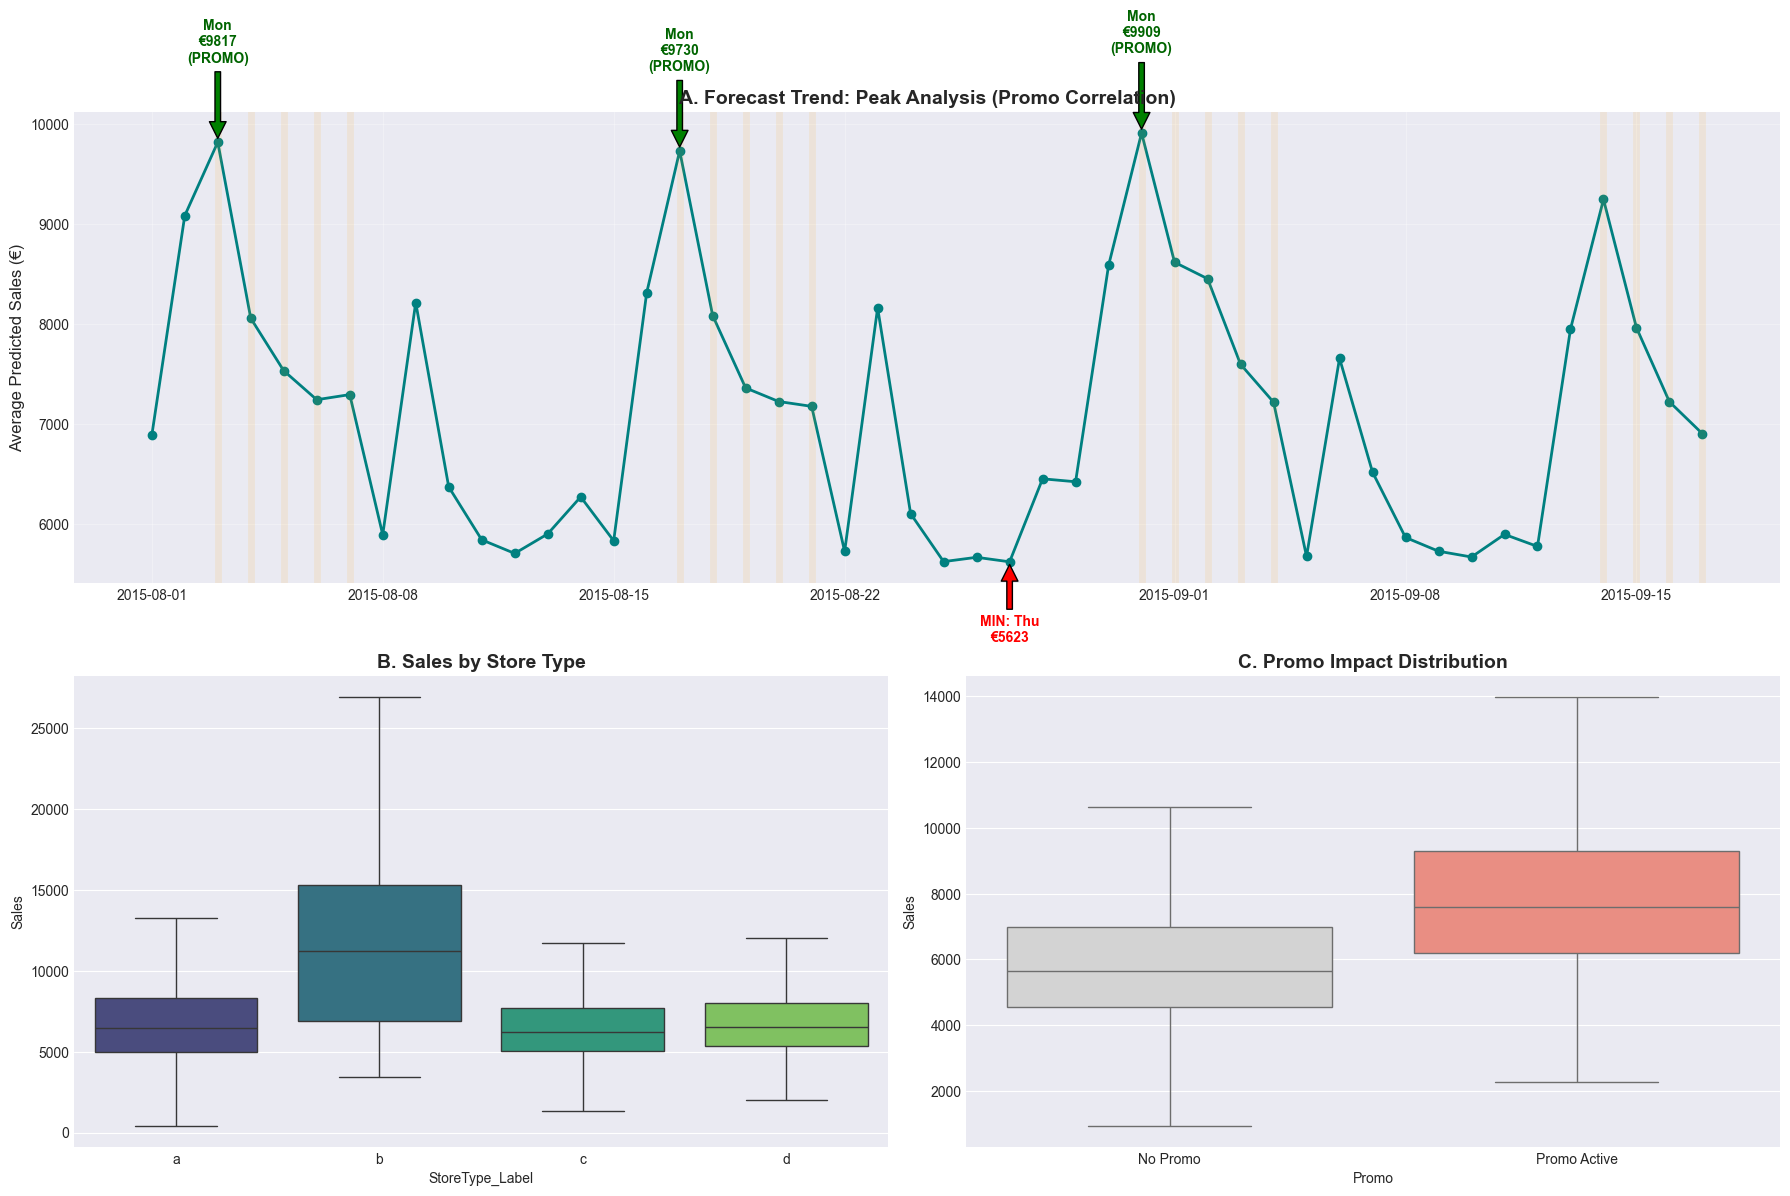

ANALISI DEI PICCHI MASSIMI (TOP 3 DAYS):
DATA: 2015-08-31 (Monday)
 - Vendita Media Prevista: €9909
 - Promo Attiva: SÌ
------------------------------
DATA: 2015-08-03 (Monday)
 - Vendita Media Prevista: €9817
 - Promo Attiva: SÌ
------------------------------
DATA: 2015-08-17 (Monday)
 - Vendita Media Prevista: €9730
 - Promo Attiva: SÌ
------------------------------

CONCLUSIONE:
✅ IL MODELLO FUNZIONA: Tutti i picchi massimi coincidono con giorni di PROMOZIONE.


In [208]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

print("--- DASHBOARD FINALE: ANALISI PICCHI E MINIMI ---")

# 1. Preparazione Dati
test_open_only = test[test['Sales'] > 0].copy()
daily_avg_sales = test_open_only.groupby('Date')[['Sales', 'Promo']].mean()

# Identificazione Top 3 Picchi (Max)
top_3_days = daily_avg_sales.sort_values('Sales', ascending=False).head(3)

# Identificazione Bottom 1 Picco (Min) - Già fatto, ma lo rifacciamo per completezza
min_day = daily_avg_sales.sort_values('Sales', ascending=True).head(1)

# 2. Setup Grafici
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(2, 2)

# --- PLOT A: Trend Temporale con Annotazioni ---
ax1 = fig.add_subplot(gs[0, :])
ax1.plot(daily_avg_sales.index, daily_avg_sales['Sales'], marker='o', linestyle='-', color='teal', linewidth=2)

# Evidenziamo le zone Promo (Sfondo Arancione)
promo_dates = daily_avg_sales[daily_avg_sales['Promo'] == 1].index
for date in promo_dates:
    ax1.axvline(date, color='orange', alpha=0.1, linewidth=5) # Linee verticali spesse per simulare area

# Annotiamo i TOP 3 PICCHI
for date, row in top_3_days.iterrows():
    sales_val = row['Sales']
    is_promo = "PROMO" if row['Promo'] == 1 else "NO PROMO"
    day_name = date.day_name()[:3] # Mon, Tue...
    
    ax1.annotate(f'{day_name}\n€{sales_val:.0f}\n({is_promo})', 
                 xy=(date, sales_val), xytext=(date, sales_val + 800),
                 arrowprops=dict(facecolor='green', shrink=0.05),
                 fontsize=10, fontweight='bold', ha='center', color='darkgreen')

# Annotiamo il MINIMO
min_date = min_day.index[0]
min_val = min_day['Sales'].values[0]
min_day_name = min_date.day_name()[:3]
ax1.annotate(f'MIN: {min_day_name}\n€{min_val:.0f}', 
             xy=(min_date, min_val), xytext=(min_date, min_val - 800),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=10, fontweight='bold', ha='center', color='red')

ax1.set_title('A. Forecast Trend: Peak Analysis (Promo Correlation)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Average Predicted Sales (€)', fontsize=12)
ax1.grid(True, alpha=0.3)

# --- PLOT B & C (Invariati per contesto) ---
# Ricostruzione StoreType Label per il grafico
def get_store_type(row):
    if row.get('StoreType_b', 0) == 1: return 'b'
    if row.get('StoreType_c', 0) == 1: return 'c'
    if row.get('StoreType_d', 0) == 1: return 'd'
    return 'a'
test_open_only['StoreType_Label'] = test_open_only.apply(get_store_type, axis=1)

ax2 = fig.add_subplot(gs[1, 0])
sns.boxplot(x='StoreType_Label', y='Sales', data=test_open_only, order=['a', 'b', 'c', 'd'], 
            palette='viridis', showfliers=False, ax=ax2)
ax2.set_title('B. Sales by Store Type', fontsize=14, fontweight='bold')

ax3 = fig.add_subplot(gs[1, 1])
sns.boxplot(x='Promo', y='Sales', data=test_open_only, palette={'0': 'lightgray', '1': 'salmon'}, showfliers=False, ax=ax3)
ax3.set_title('C. Promo Impact Distribution', fontsize=14, fontweight='bold')
ax3.set_xticklabels(['No Promo', 'Promo Active'])

plt.tight_layout()
plt.show()

# --- STAMPA DIARIO DEI PICCHI ---
print("=" * 60)
print("ANALISI DEI PICCHI MASSIMI (TOP 3 DAYS):")
print("=" * 60)
for date, row in top_3_days.iterrows():
    print(f"DATA: {date.date()} ({date.day_name()})")
    print(f" - Vendita Media Prevista: €{row['Sales']:.0f}")
    print(f" - Promo Attiva: {'SÌ' if row['Promo']==1 else 'NO'}")
    print("-" * 30)

print("\nCONCLUSIONE:")
if top_3_days['Promo'].sum() == 3:
    print("✅ IL MODELLO FUNZIONA: Tutti i picchi massimi coincidono con giorni di PROMOZIONE.")
else:
    print("⚠️ ANOMALIA: Alcuni picchi avvengono senza promozione. Verificare festività o eventi locali.")

--- DASHBOARD DI VALIDAZIONE: WEEKLY & COMPETITION (STYLE REPLICA) ---


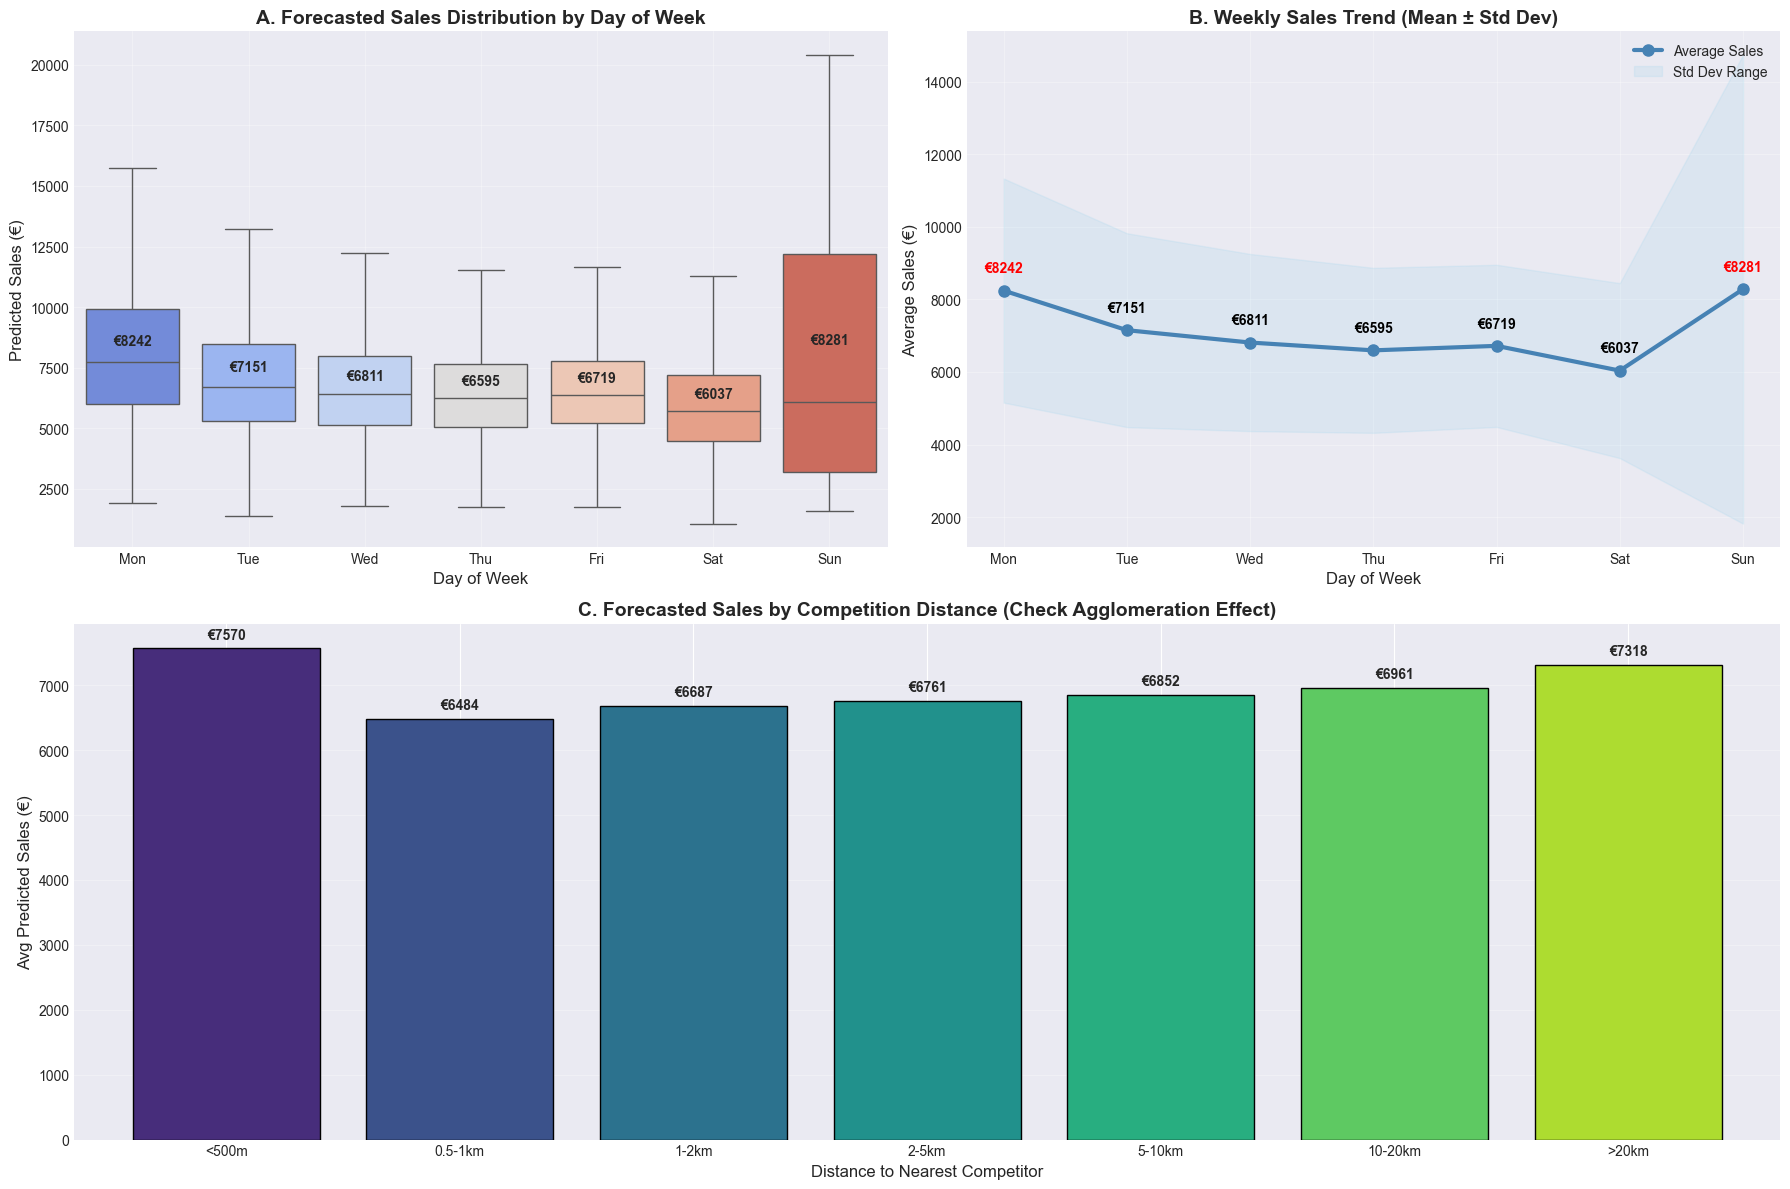

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

print("--- DASHBOARD DI VALIDAZIONE: WEEKLY & COMPETITION (STYLE REPLICA) ---")

# 1. Preparazione Dati (Filtro zeri)
df_plot = test[test['Sales'] > 0].copy()

# Ricostruzione Distanza Reale
if 'LogCompetitionDistance' in df_plot.columns:
    df_plot['CompetitionDistanceReal'] = np.expm1(df_plot['LogCompetitionDistance'])
else:
    df_plot['CompetitionDistanceReal'] = df_plot['CompetitionDistance']

# Mappatura Giorni
day_map = {1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat', 7:'Sun'}
df_plot['DayName'] = df_plot['DayOfWeek'].map(day_map)
order_days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Setup Griglia 2x2 (ma uniamo la riga sotto)
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(2, 2)

# --- PLOT A1: DayOfWeek Boxplot (Sinistra) ---
ax1 = fig.add_subplot(gs[0, 0])
sns.boxplot(x='DayName', y='Sales', data=df_plot, order=order_days, 
            palette='coolwarm', showfliers=False, ax=ax1)

ax1.set_title('A. Forecasted Sales Distribution by Day of Week', fontsize=14, fontweight='bold')
ax1.set_xlabel('Day of Week', fontsize=12)
ax1.set_ylabel('Predicted Sales (€)', fontsize=12)
ax1.grid(True, alpha=0.3)

# Medie sui box
means = df_plot.groupby('DayName')['Sales'].mean().reindex(order_days)
for i, val in enumerate(means):
    if not np.isnan(val):
        ax1.text(i, val + 200, f"€{val:.0f}", ha='center', fontsize=10, fontweight='bold')

# --- PLOT A2: Weekly Sales Trend (Destra - Mean + Std) ---
ax2 = fig.add_subplot(gs[0, 1])
weekly_stats = df_plot.groupby('DayName')['Sales'].agg(['mean', 'std']).reindex(order_days)

# Linea Media
ax2.plot(weekly_stats.index, weekly_stats['mean'], marker='o', linewidth=3, markersize=8, color='steelblue', label='Average Sales')
# Area Deviazione Standard
ax2.fill_between(weekly_stats.index, 
                 weekly_stats['mean'] - weekly_stats['std'], 
                 weekly_stats['mean'] + weekly_stats['std'], 
                 alpha=0.15, color='skyblue', label='Std Dev Range')

ax2.set_title('B. Weekly Sales Trend (Mean ± Std Dev)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Day of Week', fontsize=12)
ax2.set_ylabel('Average Sales (€)', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.legend()

# Etichette valori rossi (Stile Preprocessing)
for i, val in enumerate(weekly_stats['mean']):
    if not np.isnan(val):
        color = 'red' if i in [0, 6] else 'black' # Evidenzia Lun e Dom
        ax2.text(i, val + 500, f"€{val:.0f}", ha='center', fontsize=10, fontweight='bold', color=color)


# --- PLOT C: Competition Distance Impact (Riga Sotto Intera) ---
ax3 = fig.add_subplot(gs[1, :])

# Binning
bins = [0, 500, 1000, 2000, 5000, 10000, 20000, float('inf')]
labels = ['<500m', '0.5-1km', '1-2km', '2-5km', '5-10km', '10-20km', '>20km']
df_plot['DistBin'] = pd.cut(df_plot['CompetitionDistanceReal'], bins=bins, labels=labels)

# Calcolo Medie
dist_stats = df_plot.groupby('DistBin', observed=True)['Sales'].mean()

# Barplot Colorato
colors = sns.color_palette("viridis", len(dist_stats))
dist_stats.plot(kind='bar', color=colors, edgecolor='black', ax=ax3, width=0.8)

ax3.set_title('C. Forecasted Sales by Competition Distance (Check Agglomeration Effect)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Distance to Nearest Competitor', fontsize=12)
ax3.set_ylabel('Avg Predicted Sales (€)', fontsize=12)
ax3.grid(True, axis='y', alpha=0.3)
ax3.tick_params(axis='x', rotation=0)

# Etichette valori
for i, v in enumerate(dist_stats):
    ax3.text(i, v + 100, f"€{v:.0f}", ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [210]:
import pandas as pd

print("--- CREAZIONE REPORT AGGREGATO SEMPLICE ---")

# 1. Raggruppamento per Store e Somma delle Vendite
# reset_index() serve per riavere un dataframe piatto con colonne "Store" e "Sales"
store_prediction = test.groupby('Store')['Sales'].sum().reset_index()

# 2. Arrotondamento (opzionale, per pulizia)
store_prediction['Sales'] = store_prediction['Sales'].round(2)

# 3. Ordinamento (opzionale, per vedere chi vende di più in alto)
store_prediction = store_prediction.sort_values(by='Sales', ascending=False)

# 4. Salvataggio su CSV
filename = "store_sales_forecast_6weeks.csv"
store_prediction.to_csv(filename, index=False)

print(f"File salvato: {filename}")
print(f"Righe totali: {len(store_prediction)}")
print("\nAnteprima:")
print(store_prediction.head())

--- CREAZIONE REPORT AGGREGATO SEMPLICE ---
File salvato: store_sales_forecast_6weeks.csv
Righe totali: 856

Anteprima:
     Store      Sales
201    262 967447.188
854   1114 866129.750
433    562 830730.750
193    251 749968.750
567    733 740507.062


In [211]:
store_prediction['Sales'].sum()

243624340.0